<a href="https://colab.research.google.com/github/lhq220/original_notebook-meter-reading-YOLOv4/blob/main/original_notebook_meter_reading_YOLOv4_Roboflow_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Introduction

In this notebook, we implement [YOLOv4](https://arxiv.org/pdf/2004.10934.pdf) for training on your own dataset in PyTorch.

We also recommend reading our blog post on [Training YOLOv4 on custom data](https://blog.roboflow.ai/training-yolov4-on-a-custom-dataset/) side by side.

We will take the following steps to implement YOLOv4 on our custom data:
* Set up YOLOv4 environment
* Download Custom Dataset via Roboflow
* Train Custom YOLOv4 detector
* Reload Custom YOLOv4 detector weights for inference

When you are done you will have a custom detector that you can use. It will make inference like this:

#### ![Chesse Image](https://i.imgur.com/cGOxffX.png)

### **Reach out for support**

If you run into any hurdles on your own data set or just want to share some cool results in your own domain, [reach out!](https://roboflow.ai/contact) 


#### ![Roboflow Workmark](https://i.imgur.com/WHFqYSJ.png)

# Set up YOLOv4 Environment

In [ ]:
!git clone https://github.com/roboflow-ai/pytorch-YOLOv4.git

Cloning into 'pytorch-YOLOv4'...
remote: Enumerating objects: 398, done.
remote: Total 398 (delta 0), reused 0 (delta 0), pack-reused 398
Receiving objects: 100% (398/398), 926.53 KiB | 28.95 MiB/s, done.
Resolving deltas: 100% (225/225), done.


In [ ]:
#!pip install "requests[security]"
!pip install pyopenssl ndg-httpsclient pyasn1

     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 3.2MB 24.1MB/s 


In [ ]:
%cd /content/pytorch-YOLOv4
!pip install -r requirements.txt

/content/pytorch-YOLOv4
     |████████████████████████████████| 20.2MB 6.2MB/s 
     |████████████████████████████████| 753.4MB 23kB/s 
     |████████████████████████████████| 12.6MB 243kB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 122kB 56.4MB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.4.0 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.4.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.18.2 which is incompatible.
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 2.2.3 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 2.2.3 which is incompatible.
ERROR: kapre 0.3.5 has requirement numpy>=1.18.5, but you'll have numpy 1.18.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium=

In [ ]:
# download yolov4 weights that have already been converted to Python
!gdown https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA

Downloading...
From: https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA
To: /content/yolov4.conv.137.pth
170MB [00:01, 88.7MB/s]


# Download Custom Dataset

## Export Your Dataset from Roboflow

Roboflow enables you to export your dataset in any format you need - including for this notebook.

Create a [free account](https://app.roboflow.ai). Upload your private dataset. Generate a version (applying any preprocessing and augmentations you desire). Create an export. Select **YOLOv4 PyTorch** as the export format. Click **"Show Download code"**, copy your link, and paste it in the next cell. Magic.

In [ ]:
# REPLACE this link with your Roboflow dataset (export as YOLOv4 PyTorch format)
!curl -L "https://app.roboflow.com/ds/dj3mPNY32j?key=wRu2iHuzTP" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1947      0 --:--:-- --:--:-- --:--:--  1943
100 45.0M  100 45.0M    0     0  51.7M      0 --:--:-- --:--:-- --:--:-- 51.7M
Archive:  roboflow.zip
 extracting: test/4d0391_jpg.rf.1a980cc4503112c7984e05a715a17413.jpg  
 extracting: test/6caf66_jpg.rf.014f83bc4ad95aa81a84f29ccb0c286e.jpg  
 extracting: test/402039_jpg.rf.0c3d93ef7f4d433c6d800c756e69e163.jpg  
 extracting: test/48bea7_jpg.rf.12124a6d86d095fbbd074f8992a6ad43.jpg  
 extracting: test/11eeaa_jpg.rf.1c0a7f8121a48655bf60b8481388457a.jpg  
 extracting: test/9a9955_jpg.rf.2075074c965de67c222445f3d3e7b263.jpg  
 extracting: test/3275da_jpg.rf.26ccf652a21ce78dd3d81ced8d332c4e.jpg  
 extracting: test/57c155_jpg.rf.2d65d4eea62702af9d93c074b0f09f46.jpg  
 extracting: test/4fc120_jpg.rf.2dd52ce239850f778b282bc033fe4edc.jpg  
 extracting: test/3160

In [ ]:
%cp train/_annotations.txt train/train.txt
%cp train/_annotations.txt train.txt
%cp valid/_annotations.txt data/val.txt
%cp valid/*.jpg train/

In [ ]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')

In [ ]:
print(num_classes)

1


# Train Custom Detector

In [ ]:
#start training
#-b batch size (you should keep this low (2-4) for training to work properly)
#-s number of subdivisions in the batch, this was more relevant for the darknet framework
#-l learning rate
#-g direct training to the GPU device
#pretrained invoke the pretrained weights that we downloaded above
#classes - number of classes
#dir - where the training data is
#epoch - how long to train for
!python train.py -b 2 -s 1 -l 0.001 -g 0 -pretrained ./yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 50

log file path:log/log_2021-06-17_01-39-08.txt
2021-06-17 01:39:08,492 train.py[line:435] INFO: Using device cpu
2021-06-17 01:39:13,739 train.py[line:282] INFO: Starting training:
        Epochs:          50
        Batch size:      2
        Subdivisions:    1
        Learning rate:   0.001
        Training size:   1540
        Validation size: 155
        Checkpoints:     True
        Device:          cpu
        Images size:     608
        Optimizer:       adam
        Dataset classes: 1
        Train label path:train.txt
        Pretrained:
    
Epoch 1/50:   0%|       | 0/1540 [00:00<?, ?img/s]/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Epoch 1/50:   1%| | 10/1540 [03:07<7:57:15, 18.72s
2021-06-17 01:42:21,284 train.py[line:450] INFO: Saved interrupt


# Load Trained Weights for Custom Detection

You can also use this to load previously saved weights!

In [ ]:
#looking at the weights that our model has saved during training
!ls checkpoints

Yolov4_epoch10.pth  Yolov4_epoch22.pth	Yolov4_epoch34.pth  Yolov4_epoch46.pth
Yolov4_epoch11.pth  Yolov4_epoch23.pth	Yolov4_epoch35.pth  Yolov4_epoch47.pth
Yolov4_epoch12.pth  Yolov4_epoch24.pth	Yolov4_epoch36.pth  Yolov4_epoch48.pth
Yolov4_epoch13.pth  Yolov4_epoch25.pth	Yolov4_epoch37.pth  Yolov4_epoch49.pth
Yolov4_epoch14.pth  Yolov4_epoch26.pth	Yolov4_epoch38.pth  Yolov4_epoch4.pth
Yolov4_epoch15.pth  Yolov4_epoch27.pth	Yolov4_epoch39.pth  Yolov4_epoch50.pth
Yolov4_epoch16.pth  Yolov4_epoch28.pth	Yolov4_epoch3.pth   Yolov4_epoch5.pth
Yolov4_epoch17.pth  Yolov4_epoch29.pth	Yolov4_epoch40.pth  Yolov4_epoch6.pth
Yolov4_epoch18.pth  Yolov4_epoch2.pth	Yolov4_epoch41.pth  Yolov4_epoch7.pth
Yolov4_epoch19.pth  Yolov4_epoch30.pth	Yolov4_epoch42.pth  Yolov4_epoch8.pth
Yolov4_epoch1.pth   Yolov4_epoch31.pth	Yolov4_epoch43.pth  Yolov4_epoch9.pth
Yolov4_epoch20.pth  Yolov4_epoch32.pth	Yolov4_epoch44.pth
Yolov4_epoch21.pth  Yolov4_epoch33.pth	Yolov4_epoch45.pth


In [ ]:
#choose random test image
import os
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);

In [ ]:
img_path

'test/fc831c_jpg.rf.fe87901523c73584ff1cf901012c3d74.jpg'

In [ ]:
# make prediction for each file in the test folder
for file in test_images:
  !python models.py {num_classes} checkpoints/Yolov4_epoch50.pth {file} test/_classes.txt

In [ ]:
# list of files ending with .jpg in the folder train
train_images = [f for f in os.listdir('train') if f.endswith('.jpg')]
len(train_images)

1695

In [ ]:
# list of files ending with .jpg in the folder val
valid_images = [f for f in os.listdir('valid') if f.endswith('.jpg')]
len(valid_images)

155

In [ ]:
%%time
##change the epoch here to the one you would like to use for inference
!python models.py {num_classes} checkpoints/Yolov4_epoch50.pth {img_path} test/_classes.txt

counter: 1.000000
save plot results to test_predictions_30082020_043803_epoch50/fc831c_predictions_30082020_043803_epoch50.jpg
CPU times: user 15.1 ms, sys: 7.53 ms, total: 22.6 ms
Wall time: 5.84 s


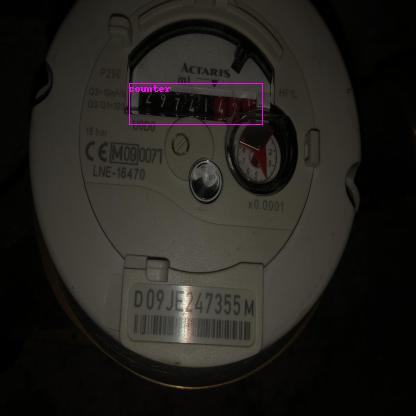

In [ ]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')